In [1]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")   
print(df.head())
print(df.info())
print(df.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [2]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


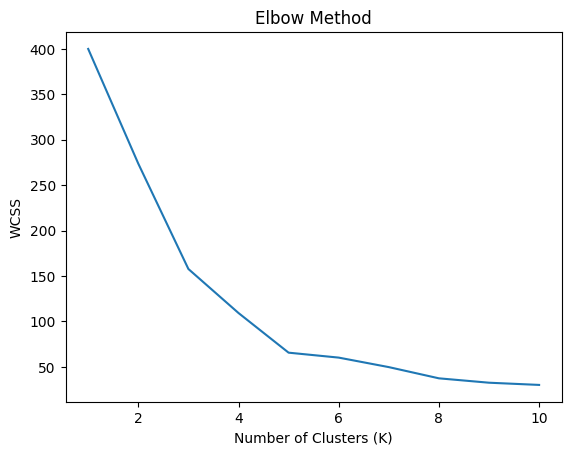

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


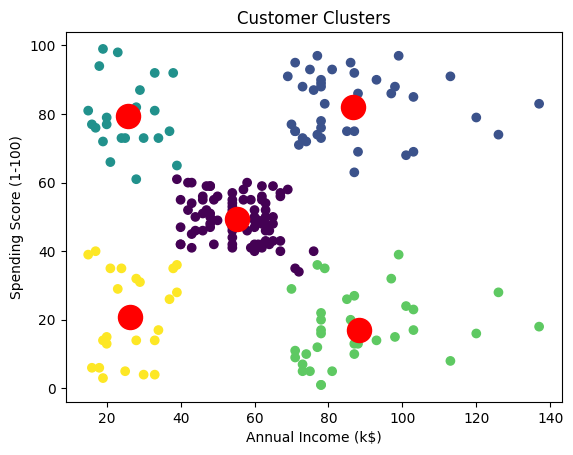

In [6]:
plt.figure()

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['Cluster'])
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
            s=300, c='red')

plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [7]:
profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(profile)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [8]:
for c in profile.index:
    print("\nCluster", c)
    print(profile.loc[c])



Cluster 0
Annual Income (k$)        55.296296
Spending Score (1-100)    49.518519
Name: 0, dtype: float64

Cluster 1
Annual Income (k$)        86.538462
Spending Score (1-100)    82.128205
Name: 1, dtype: float64

Cluster 2
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
Name: 2, dtype: float64

Cluster 3
Annual Income (k$)        88.200000
Spending Score (1-100)    17.114286
Name: 3, dtype: float64

Cluster 4
Annual Income (k$)        26.304348
Spending Score (1-100)    20.913043
Name: 4, dtype: float64


In [9]:
kmeans2 = KMeans(n_clusters=5, random_state=99)
df['Cluster_new'] = kmeans2.fit_predict(X_scaled)

print(df[['Cluster', 'Cluster_new']].head())


   Cluster  Cluster_new
0        4            3
1        2            4
2        4            3
3        2            4
4        4            3


In [10]:
profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(profile)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
